<a href="https://colab.research.google.com/github/EiffL/Tutorials/blob/master/PhotozCNN/photoz_inference_tfdatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019-2021 Francois Lanusse.

Licensed under the Apache License, Version 2.0 (the "License");

# Photometric Redshift Estimation with TensorFlow - Part II: Dataset preparation with TensorFlow Datasets

Author: [@EiffL](https://github.com/EiffL) (Francois Lanusse)

### Overview

This second notebook in the series focuses on an important step in a ML project,
setting up your dataset.

### Learning objectives

In this notebook, we will learn how to:
*   Create a dataset with TensorFlow Datasets



### Imports

In [41]:
%pylab inline
%load_ext autoreload
%autoreload 2
import h5py
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## A first look at TensorFlow Datasets



In [48]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [52]:
# Loading the MNIST dataset
dset = tfds.load('mnist', split='train')

In [53]:
# Build your input pipeline
dset = dset.shuffle(1024)
dset = dset.batch(32)
dset = dset.prefetch(tf.data.AUTOTUNE)

In [54]:
for example in dset.take(1):
  image, label = example["image"], example["label"]

In [55]:
image.shape

TensorShape([32, 28, 28, 1])

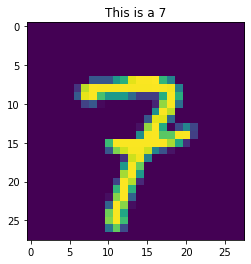

In [62]:
imshow(image[0,:,:,0])
title('This is a %d'%label[0]);

Why TensorFlow datasets:

- Makes manipulating your dataset very easy
- Easily share your data
- Maximises the speed at which data can be fed to the GPU

## Let's get some data

As in any problem, our first step is to do some quick inspection of the data


In [63]:
# Path to the dataset
bucket_name='ahw2019'

# Download the dataset from Google cloud
!gsutil cp gs://{bucket_name}/hsc_photoz/data/catalog_small.fits catalog_small.fits
print('Catalog download complete')
!gsutil cp gs://{bucket_name}/hsc_photoz/data/cutouts_small.hdf cutouts_small.hdf
print('Cutouts download complete')

Copying gs://ahw2019/hsc_photoz/data/catalog_small.fits...
/ [1 files][500.6 KiB/500.6 KiB]                                                
Operation completed over 1 objects/500.6 KiB.                                    
Catalog download complete
Copying gs://ahw2019/hsc_photoz/data/cutouts_small.hdf...
| [1 files][147.9 MiB/147.9 MiB]                                                
Operation completed over 1 objects/147.9 MiB.                                    
Cutouts download complete


In [64]:
# Loading the data
catalog = Table.read('catalog_small.fits')       # This is an astropy table
cutouts = h5py.File('cutouts_small.hdf', 'r')    # This is a set of images

In [66]:
# Let's have a look at the catalog
catalog

object_id,ra,dec,tract,patch,a_g,a_r,a_i,a_z,a_y,g_extendedness_value,r_extendedness_value,i_extendedness_value,z_extendedness_value,y_extendedness_value,g_localbackground_flux,r_localbackground_flux,i_localbackground_flux,z_localbackground_flux,y_localbackground_flux,g_cmodel_flux,g_cmodel_fluxsigma,g_cmodel_exp_flux,g_cmodel_exp_fluxsigma,g_cmodel_dev_flux,g_cmodel_dev_fluxsigma,r_cmodel_flux,r_cmodel_fluxsigma,r_cmodel_exp_flux,r_cmodel_exp_fluxsigma,r_cmodel_dev_flux,r_cmodel_dev_fluxsigma,i_cmodel_flux,i_cmodel_fluxsigma,i_cmodel_exp_flux,i_cmodel_exp_fluxsigma,i_cmodel_dev_flux,i_cmodel_dev_fluxsigma,z_cmodel_flux,z_cmodel_fluxsigma,z_cmodel_exp_flux,z_cmodel_exp_fluxsigma,z_cmodel_dev_flux,z_cmodel_dev_fluxsigma,y_cmodel_flux,y_cmodel_fluxsigma,y_cmodel_exp_flux,y_cmodel_exp_fluxsigma,y_cmodel_dev_flux,y_cmodel_dev_fluxsigma,g_cmodel_mag,g_cmodel_magsigma,g_cmodel_exp_mag,g_cmodel_exp_magsigma,g_cmodel_dev_mag,g_cmodel_dev_magsigma,r_cmodel_mag,r_cmodel_magsigma,r_cmodel_exp_mag,r_cmodel_exp_magsigma,r_cmodel_dev_mag,r_cmodel_dev_magsigma,i_cmodel_mag,i_cmodel_magsigma,i_cmodel_exp_mag,i_cmodel_exp_magsigma,i_cmodel_dev_mag,i_cmodel_dev_magsigma,z_cmodel_mag,z_cmodel_magsigma,z_cmodel_exp_mag,z_cmodel_exp_magsigma,z_cmodel_dev_mag,z_cmodel_dev_magsigma,y_cmodel_mag,y_cmodel_magsigma,y_cmodel_exp_mag,y_cmodel_exp_magsigma,y_cmodel_dev_mag,y_cmodel_dev_magsigma,g_sdssshape_shape11,g_sdssshape_shape12,g_sdssshape_shape22,g_sdssshape_psf_shape11,g_sdssshape_psf_shape12,g_sdssshape_psf_shape22,r_sdssshape_shape11,r_sdssshape_shape12,r_sdssshape_shape22,r_sdssshape_psf_shape11,r_sdssshape_psf_shape12,r_sdssshape_psf_shape22,i_sdssshape_shape11,i_sdssshape_shape12,i_sdssshape_shape22,i_sdssshape_psf_shape11,i_sdssshape_psf_shape12,i_sdssshape_psf_shape22,z_sdssshape_shape11,z_sdssshape_shape12,z_sdssshape_shape22,z_sdssshape_psf_shape11,z_sdssshape_psf_shape12,z_sdssshape_psf_shape22,y_sdssshape_shape11,y_sdssshape_shape12,y_sdssshape_shape22,y_sdssshape_psf_shape11,y_sdssshape_psf_shape12,y_sdssshape_psf_shape22,d_pos,d_mag,specz_ra,specz_dec,specz_redshift,specz_redshift_err,specz_mag_i
int64,float64,float64,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32
36411448540287158,30.562276872708594,-6.5731357255499,8279,5,0.08952414,0.06288795,0.045121275,0.034897838,0.029703228,1.0,1.0,1.0,1.0,1.0,1.0529741,3.6013403,6.4329,10.226084,8.08365,8260.022,49.13008,6022.789,35.85489,8492.892,50.51518,28894.781,83.49296,22014.06,63.56267,30210.605,87.36212,57798.676,92.01629,43836.74,69.697845,60111.51,95.77002,78503.34,187.22095,60088.613,143.3556,82336.15,196.48686,99908.89,388.1478,74742.33,290.95856,102255.445,397.29822,21.607548,0.0064578885,21.950506,0.0064636082,21.57736,0.0064578895,20.247952,0.0031372905,20.54325,0.0031349189,20.1996,0.003139699,19.495205,0.0017285069,19.795404,0.0017262569,19.452606,0.0017298013,19.16278,0.002589349,19.453018,0.0025902805,19.111023,0.0025909992,18.90099,0.004218104,19.216084,0.0042265775,18.875784,0.004218465,0.3077157,-0.021981485,0.22944404,0.09824987,-0.0036499354,0.09146403,0.31925806,-0.015762126,0.26133165,0.085869916,-0.00062206085,0.10081115,0

In [67]:
# Let's have a look at the cutouts file
cutouts.keys()

<KeysViewHDF5 ['36411448540287158', '36411448540288304', '36411448540291562', '36411452835255019', '36411452835257744', '36411452835259516', '36411457130207348', '36411457130221504', '36411457130224053', '36411581684277685', '36411585979238387', '36411585979238568', '36411585979239457', '36411585979242403', '36411585979245887', '36411590274207452', '36411590274212062', '36411590274213554', '36411594569174444', '36411594569174875', '36411594569177094', '36411594569177260', '36411594569180078', '36411594569180437', '36411594569181301', '36411594569181522', '36411598864144598', '36411719123228936', '36411719123232150', '36411723418198880', '36411723418199392', '36411727713160867', '36411727713162690', '36411727713163519', '36411727713164695', '36411727713164760', '36411732008130294', '36411732008131445', '36411732008131881', '36411732008132499', '36411732008134943', '36411732008135247', '36411732008137199', '36411736303097068', '36411736303099856', '36411860857155041', '36411865152121150'

In [69]:
cutouts['36411448540288304'].keys()

<KeysViewHDF5 ['HSC-G', 'HSC-I', 'HSC-R', 'HSC-Y', 'HSC-Z']>

In [70]:
cutouts['36411448540288304']['HSC-I'].keys()

<KeysViewHDF5 ['HDU0', 'HDU1', 'HDU2', 'PRIMARY']>

In [73]:
cutouts['36411448540288304']['HSC-I']['HDU0'].keys()

<KeysViewHDF5 ['DATA']>

In [81]:
im = cutouts['36411448540288304']['HSC-I']['HDU0']['DATA']
im.shape

(67, 66)

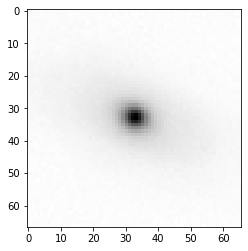

In [82]:
imshow(im, cmap='gray_r')

In [105]:
def stack_bands(cutout, target_size=64):
  import numpy as np

  filters = ['HSC-G', 'HSC-R', 'HSC-I', 'HSC-Z', 'HSC-Y']

  # Retrieve the cutouts in all the bands
  im = [cutout[f]['HDU0']['DATA'][:] for f in filters]

  # Stack all bands in one array
  im_size = min([min(i.shape) for i in im])
  im = np.stack([i[:im_size, :im_size] for i in im], axis=-1).astype('float32')

  # Resize image to target size
  centh = im.shape[0]/2
  centw = im.shape[1]/2
  lh, rh = int(centh-target_size/2), int(centh+target_size/2)
  lw, rw = int(centw-target_size/2), int(centw+target_size/2)
  cropped = im[lh:rh, lw:rw, :]
  assert cropped.shape[0]==target_size and cropped.shape[1]==target_size, f"Wrong size! Still {cropped.shape}"
  return cropped

In [96]:
im = stack_bands(cutouts['36411448540288304'])
im.shape

(64, 64, 5)

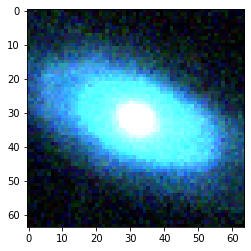

In [103]:
imshow(im[:,:,:3]);

## Let's create a new TensorFlow Dataset for our HSC data

### Step I: Create a new empty dataset file

In [104]:
!tfds new hsc_photoz

2021-12-01 10:10:43.061256: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Dataset generated at /content/hsc_photoz
You can start searching `TODO(hsc_photoz)` to complete the implementation.
Please check https://www.tensorflow.org/datasets/add_dataset for additional details.


You can now find the empty template for defining your dataset in the `hsc_photoz` folder. 

Open `hsc_photoz/hsc_photoz.py` and take a look!

We will start by adding a few important imports at the top of the file:

```python
"""hsc_photoz dataset."""
import numpy as np
import tensorflow as tf
...
```

### Step II: Define your dataset metadata

In the `_info()` method, there are two important things to define:
- The features
- The supervised keys 


#### Features

In our dataset, we have a set of images of size 64x64 with 5 bands, and a bunch of associated keys.


```python
    ...,
    features=tfds.features.FeaturesDict({
    'image': tfds.features.Tensor(shape=(64, 64, 5), dtype=tf.float32),
    'attrs': {k: tf.float32 for k in ['specz_redshift', 'a_g', 'a_r', 'a_i', 'a_z', 'a_y']}
        }),
    ...,
```

#### Supervised keys

The main task we want to do with this dataset is to infer redshifts from images, so we can explicitly define the following supervised keys:

```python
    ...,
    supervised_keys=('image', 'attrs/specz_redshift'),
    ...,
```


### Step III: Define how to download your data

One very nice feature of TensorFlow dataset is that you tell it how to download the data from the internet, so that you can easily share the dataset with other people.

This is defined inside the `_split_generators()` method.

You can modify your function to the following:

```python
  def _split_generators(self, dl_manager: tfds.download.DownloadManager):
    """Returns SplitGenerators."""
    # Let TF dataset download our data and put automatically in a temporary folder
    catalog_path = dl_manager.download('https://storage.googleapis.com/ahw2019/hsc_photoz/data/catalog_small.fits')
    cutouts_path = dl_manager.download('https://storage.googleapis.com/ahw2019/hsc_photoz/data/cutouts_small.hdf')
    return [
        tfds.core.SplitGenerator(
            name=tfds.Split.TRAIN,
            # These kwargs will be passed to _generate_examples
            gen_kwargs={'catalog_path': catalog_path,
                        'cutouts_path': cutouts_path},
        ),
    ]
```

### Step IV: Define how to read your data from the native files


```python
  def _generate_examples(self, catalog_path, cutouts_path):
    """Yields examples."""
    from astropy.table import Table
    import h5py

    # Loading the data that was downloaded at the previous step
    catalog = Table.read(catalog_path)
    cutouts = h5py.File(cutouts_path, 'r')

    # Go through the examples
    for object_id in catalog['object_id']:
      row = catalog[catalog['object_id'] == object_id]
      cutout = cutouts[str(object_id)]

      # extract image from cutouts
      im = stack_bands(cutout)
      
      yield object_id, {'image': im, 
                        'attrs':{k: np.asscalar(row[k]) for k in ['specz_redshift', 'a_g', 'a_r', 'a_i', 'a_z', 'a_y']}}
```

and **don't forget to also add our `stack_bands()` function** to your file as well ;-) 

### Step V: Profit!

Make sure you have saved your edited file, and you should now be able to do the following:

In [106]:
import hsc_photoz

In [112]:
dset = tfds.load('hsc_photoz', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/hsc_photoz/1.0.0.incomplete51TY3M/hsc_photoz-train.tfrecord


  0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset hsc_photoz downloaded and prepared to /root/tensorflow_datasets/hsc_photoz/1.0.0. Subsequent calls will reuse this data.


In [113]:
dset

<PrefetchDataset shapes: {attrs: {a_g: (), a_i: (), a_r: (), a_y: (), a_z: (), specz_redshift: ()}, image: (64, 64, 5)}, types: {attrs: {a_g: tf.float32, a_i: tf.float32, a_r: tf.float32, a_y: tf.float32, a_z: tf.float32, specz_redshift: tf.float32}, image: tf.float32}>

In [114]:
for example in dset.take(1):
  print(example['attrs']['specz_redshift'])

tf.Tensor(0.78139, shape=(), dtype=float32)


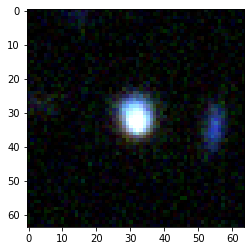

In [116]:
imshow(example['image'][:,:,0:3])